In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

%run '../functions.py'
%run '../classes.py'
model_w2v_settings = return_best_model()
import copy as cp
model_w2v_settings = cp.deepcopy(model_w2v_settings)
model_w2v_settings['model_path'] = "../all_datasets/" + model_w2v_settings['model_path']

model_w2v = Word2VecModel(model_w2v_settings)

# read preprocessed data from pickle file
df = pd.read_pickle('data/preprocessed_titles_labels.pkl')
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adammajczyk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/adammajczyk/nltk_data..

,title,is_clickbait,text,dataset,sample
0,"[seventeen, time, game, throne, matched, perfe...",1,NaN,clickbait-dataset,train
1,"[facing, texas, tar, heel, territory, duke, fi...",0,NaN,clickbait-dataset,train
4,"[wikinews, interview, kevin, baugh, president,...",0,NaN,clickbait-dataset,train
6,"[identify, justin, bieber, music, video, youtu...",1,NaN,clickbait-dataset,train
9,"[uganda, introduces, antihomosexual, legislation]",0,NaN,clickbait-dataset,train


In [5]:
# split data into train and test stratified by y
import os
import pickle

df['title_vector'] = [get_word_vectors(model_w2v, title, aggregation='mean') for title in df['title']]

X_train = np.vstack(df[df['sample']=='train']['title_vector'])
X_test = np.vstack(df[df['sample']=='val2']['title_vector'])



y_train = df[df['sample']=='train']['is_clickbait']
y_test = df[df['sample']=='val2']['is_clickbait']


# read scaler from file
with open('predictive_models/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=[f'dim_{i}' for i in range(X_train_scaled.shape[1])])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=[f'dim_{i}' for i in range(X_test_scaled.shape[1])])

In [7]:
X_train_scaled_df

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19
0,-0.475267,-0.309805,-0.728354,1.630854,1.017820,0.204842,-0.944171,-0.845539,-0.984322,-0.606849,-1.391476,0.016858,-0.189550,0.247876,2.433173,0.353701,-0.569750,-0.408800,-1.003858,0.650272
1,0.604204,-0.580565,-0.509133,-0.360233,0.401199,-1.042666,0.699060,0.537875,0.471204,0.325657,0.624672,0.252375,0.421234,0.284469,-1.000349,-1.702251,0.478234,0.454979,-0.284734,0.284949
2,2.970681,-0.267780,-2.047123,-2.387600,2.842046,0.411846,-0.070924,-0.123906,-3.354797,-0.006114,2.888547,0.179363,-0.290923,-0.740573,1.901210,0.599725,-0.023884,0.038588,-0.377398,0.750188
3,1.175408,-1.162556,0.410761,0.563982,-0.959713,-0.006634,0.288969,-1.421863,-0.344390,-2.043244,-0.504986,-0.193944,-0.641345,-0.897433,0.678406,0.224409,-1.381788,0.346356,-0.377938,-0.765181
4,2.414472,-0.627381,-1.382891,-0.190311,1.181199,-2.911875,-1.100497,0.379793,-2.635916,1.860797,0.336854,-1.658568,2.551813,-0.104408,-0.828532,-0.684435,0.807312,-1.540931,-0.185717,0.045602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,-0.034514,-0.410066,-0.594345,-0.361694,0.246307,0.028244,-1.259790,0.383046,-1.268451,-0.078437,0.250561,1.373038,-1.723845,0.274702,1.066038,-0.222273,-0.198468,0.577932,0.678056,0.501503
28832,-0.017012,0.995601,-0.826107,-1.000126,0.466932,-0.818423,-0.246509,-0.643040,1.109627,-0.719904,0.450082,-0.892189,-0.378588,-1.559474,-1.629586,-0.425402,2.492926,-0.265629,0.519891,-0.736977
28833,2.000815,2.803518,-2.098857,-0.615510,2.161559,-1.404860,-1.671103,0.813120,0.993598,-1.276666,0.971198,0.300122,-0.145341,-0.763743,-0.621070,0.384317,2.999486,0.323880,-0.508646,-0.164744
28834,-0.579758,-0.858079,0.157186,1.057485,-1.404372,1.040990,-1.338065,-0.138786,0.129229,-0.132754,-0.586256,-0.126855,0.087160,0.639596,0.335585,-0.310448,-0.301579,0.382983,0.358848,0.048286


In [8]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

def return_model_with_param(model_name, param = dict()):
    if model_name == 'decision_tree':
        model = DecisionTreeClassifier(**param)
    elif model_name == 'random_forest':
        model = RandomForestClassifier(**param)
    elif model_name == 'xgboost':
        model = XGBClassifier(**param)
    elif model_name == 'lightgbm':
        model = LGBMClassifier(**param, verbose=-1)
    elif model_name == 'catboost':
        model = CatBoostClassifier(**param, verbose=0)
    return model

In [9]:
# train LightGBM model for each dimension


from sklearn.metrics import roc_auc_score, f1_score
from tqdm.notebook import tqdm



result_dict = {}
model_names = ['lightgbm', 'decision_tree',   'xgboost', 'random_forest','catboost',]
for name in model_names:
    result_dict[name] = dict()

models = dict()
for name in model_names:
    models[name] = cp.deepcopy(0)
models['lightgbm'] = 1

for name in tqdm(model_names):
    # for dim in tqdm(X_train_scaled_df.columns):
    #     model = return_model_with_param(name)
    #     model.fit(X_train_scaled_df[dim].values.reshape(-1,1), y_train)

    #     # calculate auc, f1
    #     y_pred_proba = model.predict_proba(X_test_scaled_df[dim].values.reshape(-1,1))[:, 1]
    #     auc = roc_auc_score(y_test, y_pred_proba)

    #     y_pred = model.predict(X_test_scaled_df[dim].values.reshape(-1,1))
    #     f1 = f1_score(y_test, y_pred)
    #     result_dict[name][dim] = {'auc': auc, 'f1': f1}
    model = return_model_with_param(name)

    model.fit(X_train_scaled_df, y_train)
    result_dict[name]['feature_importance'] = model.feature_importances_

    models[name] = cp.deepcopy(model)
result_df = pd.DataFrame(result_dict).T






  0%|          | 0/5 [00:00<?, ?it/s]

In [10]:
models

{'lightgbm': LGBMClassifier(verbose=-1),
 'decision_tree': DecisionTreeClassifier(),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'random_forest': RandomForestClassifier(),
 'catboost': <catboost.core.CatBoostClassifier at 0x290403a00>}

In [11]:
result_df['feature_importance_mean'] = result_df['feature_importance'].apply(lambda x: np.mean(x))
result_df['feature_importance_std'] = result_df['feature_importance'].apply(lambda x: np.std(x))

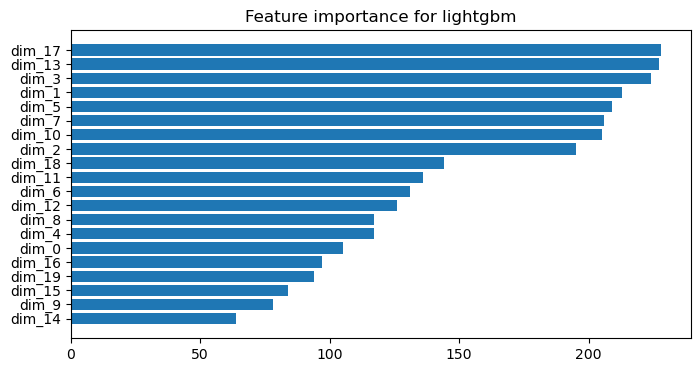

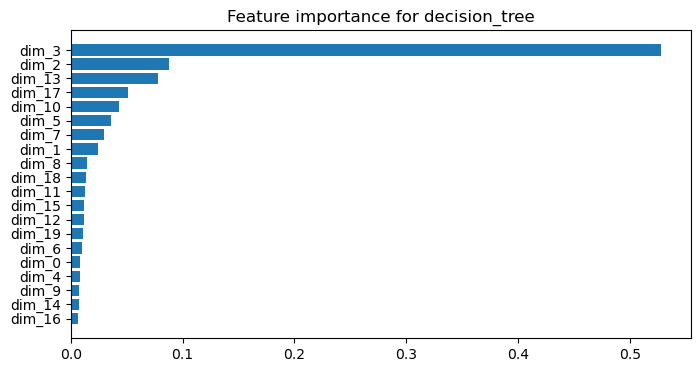

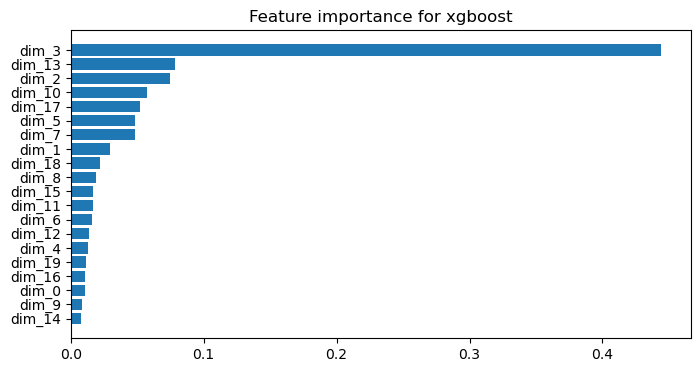

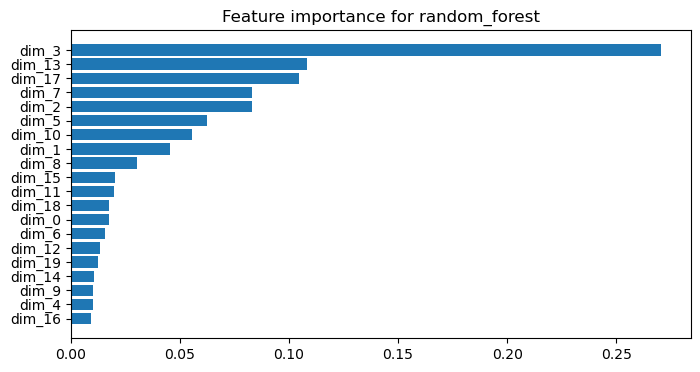

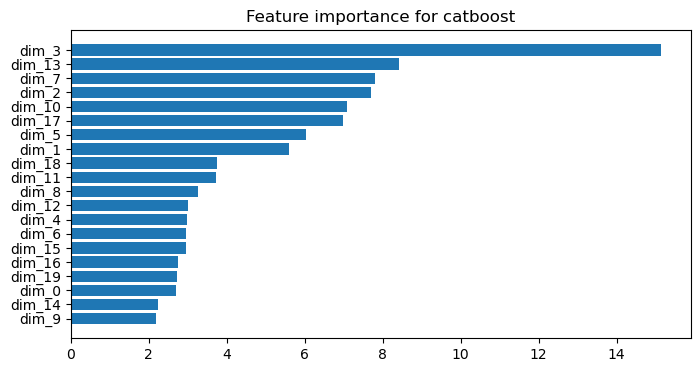

In [12]:
import matplotlib.pyplot as plt
for name in model_names:
    feature_importance = result_df.loc[name]['feature_importance']
    sorted_indices = np.argsort(feature_importance)[::]
    sorted_features = X_train_scaled_df.columns[sorted_indices]
    sorted_importance = feature_importance[sorted_indices]
    
    plt.figure(figsize=(8, 4))
    plt.barh(sorted_features, sorted_importance)
    plt.title(f'Feature importance for {name}')


In [13]:
models

{'lightgbm': LGBMClassifier(verbose=-1),
 'decision_tree': DecisionTreeClassifier(),
 'xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'random_forest': RandomForestClassifier(),
 'catboost': <catboost.core.CatBoostClassifier at 0x290403a00>}

In [14]:
# get 10 worst performing dimensions for each model based on feature importance
import dalex as dx
worst_performing_dimensions = dict()
for name in model_names:
    worst_performing_dimensions[name] = None
for name in model_names:
    explainer = dx.Explainer(models[name], X_train_scaled_df, y_train, verbose=False)
    feature_importance = explainer.model_parts().result
    feature_importance = feature_importance[feature_importance['variable'].str.contains('dim')]
    # print(feature_importance)
    sorted_importance = feature_importance.sort_values(by='dropout_loss', ascending=True)
    # get 10 worst performing dimensions
    sorted_features = sorted_importance.head(10)
    worst_performing_dimensions[name] = sorted_features['variable'].values
    print(sorted(sorted_features['variable'].values))
worst_performing_dimensions

['dim_0', 'dim_12', 'dim_14', 'dim_15', 'dim_16', 'dim_18', 'dim_19', 'dim_4', 'dim_8', 'dim_9']


/Users/adammajczyk/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['dim_0', 'dim_11', 'dim_12', 'dim_14', 'dim_16', 'dim_18', 'dim_19', 'dim_4', 'dim_6', 'dim_9']
['dim_0', 'dim_12', 'dim_14', 'dim_15', 'dim_16', 'dim_19', 'dim_4', 'dim_6', 'dim_8', 'dim_9']


/Users/adammajczyk/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['dim_0', 'dim_11', 'dim_12', 'dim_14', 'dim_16', 'dim_18', 'dim_19', 'dim_4', 'dim_6', 'dim_9']
['dim_0', 'dim_12', 'dim_14', 'dim_15', 'dim_16', 'dim_19', 'dim_4', 'dim_6', 'dim_8', 'dim_9']


{'lightgbm': array(['dim_9', 'dim_15', 'dim_14', 'dim_19', 'dim_0', 'dim_12', 'dim_16',
        'dim_4', 'dim_8', 'dim_18'], dtype=object),
 'decision_tree': array(['dim_14', 'dim_9', 'dim_4', 'dim_16', 'dim_6', 'dim_19', 'dim_0',
        'dim_12', 'dim_11', 'dim_18'], dtype=object),
 'xgboost': array(['dim_14', 'dim_9', 'dim_8', 'dim_15', 'dim_19', 'dim_12', 'dim_0',
        'dim_4', 'dim_16', 'dim_6'], dtype=object),
 'random_forest': array(['dim_9', 'dim_16', 'dim_14', 'dim_19', 'dim_0', 'dim_4', 'dim_6',
        'dim_12', 'dim_11', 'dim_18'], dtype=object),
 'catboost': array(['dim_9', 'dim_19', 'dim_15', 'dim_4', 'dim_14', 'dim_0', 'dim_8',
        'dim_12', 'dim_16', 'dim_6'], dtype=object)}

In [15]:
# get intersection of worst performing dimensions
worst_performing_dimensions_intersection = set(worst_performing_dimensions['lightgbm']).intersection(set(worst_performing_dimensions['decision_tree']), set(worst_performing_dimensions['xgboost']), set(worst_performing_dimensions['random_forest']), set(worst_performing_dimensions['catboost']))
worst_performing_dimensions_intersection, len(worst_performing_dimensions_intersection)

({'dim_0', 'dim_12', 'dim_14', 'dim_16', 'dim_19', 'dim_4', 'dim_9'}, 7)

In [16]:
# save which dimensions to remove to file
with open('predictive_models/worst_performing_dimensions_intersection.pkl', 'wb') as f:
    pickle.dump(worst_performing_dimensions_intersection, f)

Text(0, 0.5, 'Prawdopodobieństwo [0, 1]')

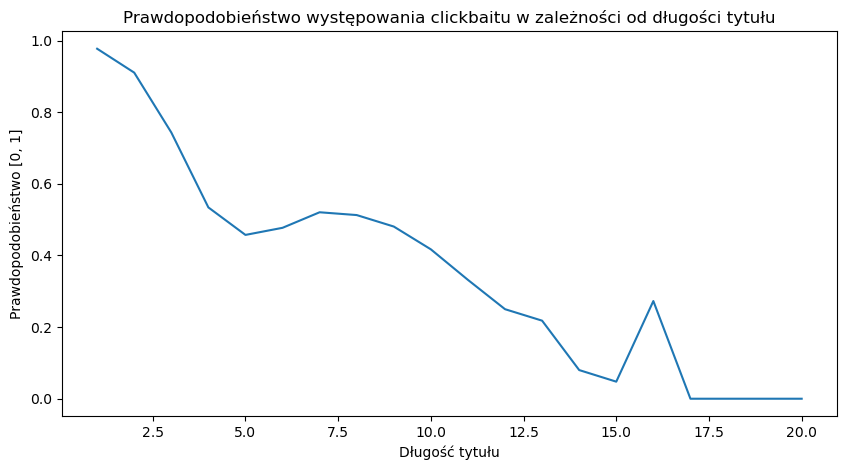

In [17]:
# do we want title length as a feature?
df['title_length'] = df['title'].apply(lambda x: len(x))

df.groupby('title_length')['is_clickbait'].mean().plot( figsize=(10, 5))
plt.title('Prawdopodobieństwo występowania clickbaitu w zależności od długości tytułu')
plt.xlabel('Długość tytułu')
plt.ylabel('Prawdopodobieństwo [0, 1]')